In [ ]:
# Obtendo a lista de todos os filmes
import httpx
import pandas as pd
from bs4 import BeautifulSoup

FILMES_NOMINADOS_XPATH = "#mw-content-text > div table"
# Obtendo a lista de todos os filmes
page = httpx.get("https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93nominated_films")

wikipedia_soup = BeautifulSoup(page.text, 'html.parser')
nominados_table_src = wikipedia_soup.select_one(FILMES_NOMINADOS_XPATH)

nominados_df = pd.read_html(str(nominados_table_src))[0]

nominados_df.head()

/tmp/ipykernel_34950/3232014058.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  nominados_df = pd.read_html(str(nominados_table_src))[0]


In [ ]:
from datetime import  date
# Associando os fimes dos ultimos 10 anos com o ID do IMDB via OMDB
nominados_df["Released"] = pd.to_numeric(nominados_df["Released"])

nominados_10_anos_df = nominados_df.query(f"Released >= {date.today().year - 10} and Released <= {date.today().year}", )

nominados_10_anos_df.head()

,Film,Released,Ceremony,Awards,Nominations,Coasr ($)
4641,Spotlight,2015,88th,2,6,$0
4642,Mad Max: Fury Road,2015,88th,6,10,$0
4643,The Revenant,2015,88th,3,12,$0
4644,Bridge of Spies,2015,88th,1,6,$0
4645,The Big Short,2015,88th,1,5,$0


In [ ]:
import httpx
import os
from dotenv import  load_dotenv
filmes_sem_dados_financeiros = []
load_dotenv()
# Testando API key
# request = httpx.get("http://www.omdbapi.com", params={
#     "apikey": os.getenv("OMDB_API_KEY"),
#     "t": "I'm srill here",
#     "y": "2024"
# })
# request.status_code

# Percorrer cada coluna e adicionar informacoes

for i, row in nominados_10_anos_df.iterrows():
    request = httpx.get("http://www.omdbapi.com", params={
        "apikey": os.getenv("OMDB_API_KEY"),
        "t": row["Film"],
        "y": row["Released"]
    })
    request.raise_for_status()
    data =request.json()
    coast = data.get("BoxOffice", "N/A")
    coast = coast.replace("$", "").replace(",", "")
    if coast == 'N/A':
        coast = None
        filmes_sem_dados_financeiros.append(row["Film"])
    else:
        coast = float(coast)
    nominados_10_anos_df.at[i, 'Cost'] = coast




,Film,Released,Ceremony,Awards,Nominations,Coasr ($),Coast ($),Cost
4641,Spotlight,2015,88th,2,6,$0,45055776.0,45055776.0
4642,Mad Max: Fury Road,2015,88th,6,10,$0,154280290.0,154280290.0
4643,The Revenant,2015,88th,3,12,$0,183637894.0,183637894.0
4644,Bridge of Spies,2015,88th,1,6,$0,72313754.0,72313754.0
4645,The Big Short,2015,88th,1,5,$0,70259870.0,70259870.0


In [237]:
import numpy as np


nominados_10_anos_df = nominados_10_anos_df[~nominados_10_anos_df["Film"].isin(filmes_sem_dados_financeiros)]
nominados_10_anos_df["Awards"] = np.int64(nominados_10_anos_df["Awards"])


In [231]:
# O custo do "Melhor filme por ano"

df_max_awards = nominados_10_anos_df.loc[nominados_10_anos_df.groupby('Released')['Awards'].idxmax()]
# O custo de "Mais nominado por ano"
df_max_nomination = nominados_10_anos_df.loc[nominados_10_anos_df.groupby('Released')['Nominations'].idxmax()]



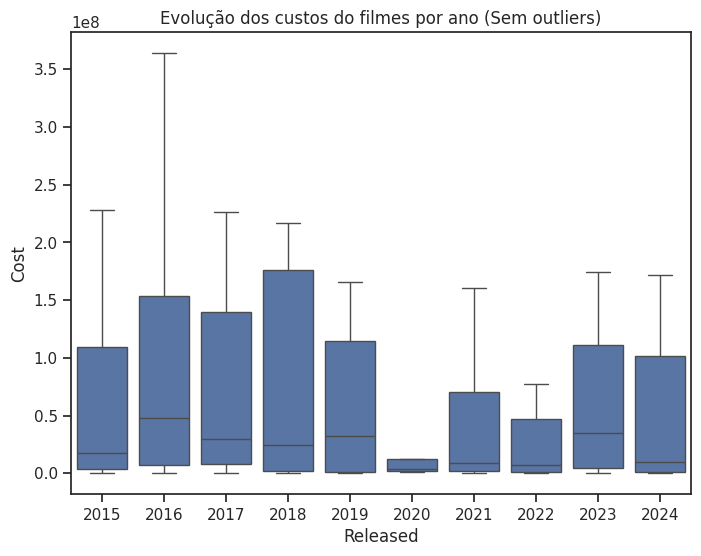

In [232]:
# Distribuição de custo de filme por ano

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Evolução dos custos do filmes por ano (Sem outliers)")
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Released", y="Cost",data=nominados_10_anos_df, showfliers=False)
plt.show()


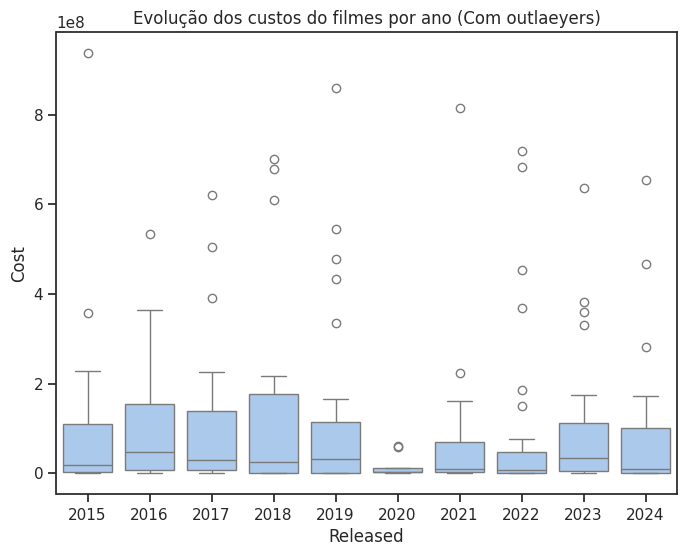

In [233]:
# Distribuição de custo de filme por ano

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Evolução dos custos do filmes por ano (Com outlaeyers)")
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Released", y="Cost",data=nominados_10_anos_df, showfliers=True)

plt.show()

<Axes: title={'center': 'Evolução do custos dos melhores filmes'}, xlabel='Released', ylabel='Cost'>

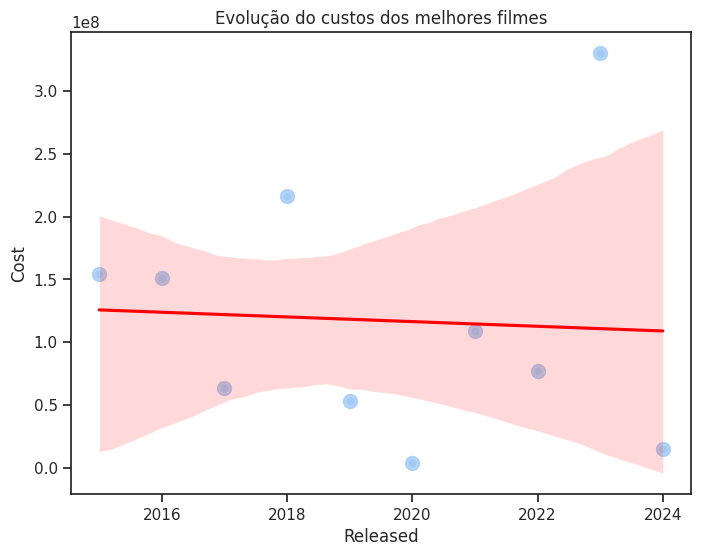

In [234]:
# Plotando o custo dos melhores filmes
import seaborn as sns

plt.figure(figsize=(8, 6))

plt.title("Evolução do custos dos melhores filmes")
sns.set_theme(style="ticks")
sns.scatterplot(data=df_max_awards, x="Released", y="Cost")
sns.regplot(data=df_max_awards, x='Released', y='Cost', scatter_kws={'s': 100}, line_kws={'color': 'red'})



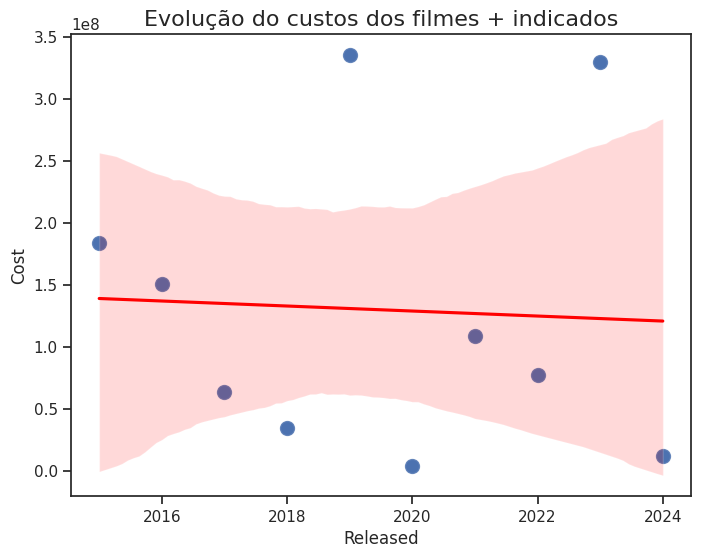

In [226]:
# Plotando o custo dos melhores filmes
plt.figure(figsize=(8, 6))
plt.title('Evolução do custos dos filmes + indicados', fontsize=16)

sns.scatterplot(data=df_max_nomination, x="Released", y="Cost", s=100)
sns.regplot(data=df_max_nomination, x='Released', y='Cost', scatter_kws={'s': 100}, line_kws={'color': 'red'})

plt.show()

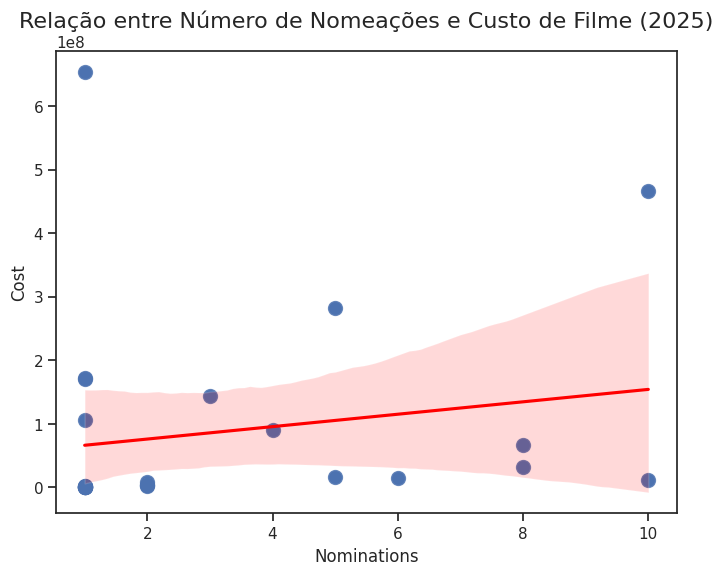

In [227]:
# Distribuição de custo x indicação 2025
import matplotlib.pyplot as plt

nominados_2025_df = nominados_10_anos_df.query(f"Released == {date.today().year -1}")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nominados_2025_df, x='Nominations', y='Cost', s=100)
plt.title('Relação entre Número de Nomeações e Custo de Filme (2025)', fontsize=16)
plt.xlabel('Número de Nomeações', fontsize=12)
plt.ylabel('Custo do Filme ($)', fontsize=12)

sns.regplot(data=nominados_2025_df, x='Nominations', y='Cost', scatter_kws={'s': 100}, line_kws={'color': 'red'})

# Exibindo o gráfico
plt.show()

/tmp/ipykernel_34950/3019499511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominados_2025_df["Awards"] = np.int64(nominados_2025_df["Awards"])


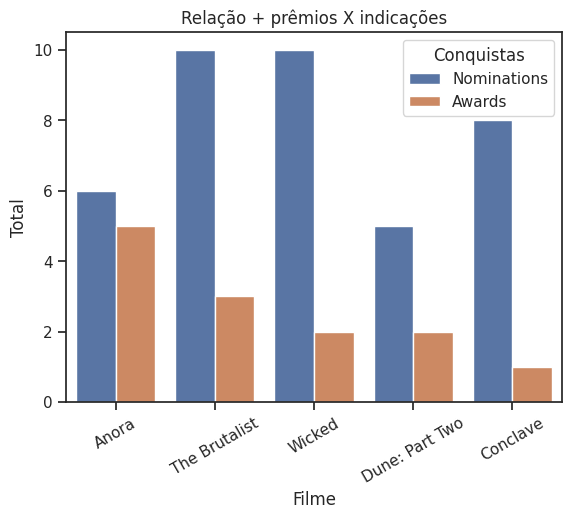

In [228]:
# Distribuição de Ganhadores X indicados
import matplotlib.pyplot as plt
import numpy as np

nominados_2025_df = nominados_10_anos_df.query(f"Released == {date.today().year -1}")
nominados_2025_df["Awards"] = np.int64(nominados_2025_df["Awards"])
nominados_2025_top_df = nominados_2025_df.nlargest(5, "Awards")



dados_long = pd.melt(nominados_2025_top_df, id_vars=['Film'], value_vars=['Nominations', 'Awards'],
                     var_name='Conquistas', value_name='Total')
plt.figure()

sns.set_color_codes("pastel")
sns.barplot(data=dados_long, x='Film', y='Total', dodge=True, hue="Conquistas")

plt.xticks(rotation=30)
plt.xlabel("Filme")
plt.title("Relação + prêmios X indicações")

# Exibindo o gráfico
plt.show()

/tmp/ipykernel_34950/2731483331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominados_2025_df["Awards"] = np.int64(nominados_2025_df["Awards"])


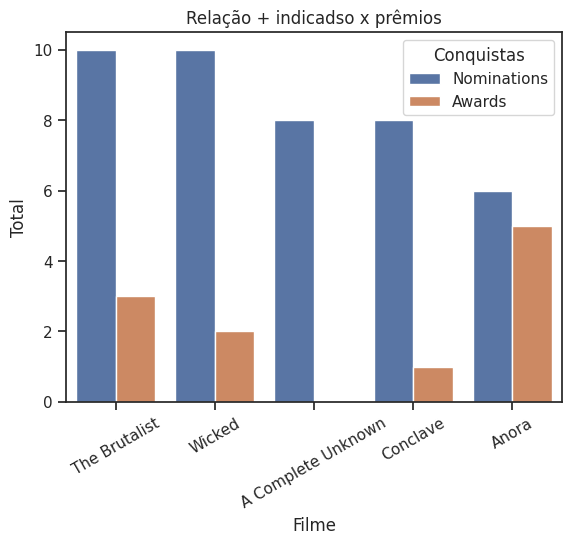

In [229]:
# Distribuição de Ganhadores X indicados
import matplotlib.pyplot as plt
import numpy as np

nominados_2025_df = nominados_10_anos_df.query(f"Released == {date.today().year -1}")
nominados_2025_df["Awards"] = np.int64(nominados_2025_df["Awards"])
nominados_2025_top_df = nominados_2025_df.nlargest(5, "Nominations")



dados_long = pd.melt(nominados_2025_top_df, id_vars=['Film'], value_vars=['Nominations', 'Awards'],
                     var_name='Conquistas', value_name='Total')
plt.figure()

sns.set_color_codes("pastel")
sns.barplot(data=dados_long, x='Film', y='Total', dodge=True, hue="Conquistas")

plt.xticks(rotation=30)
plt.xlabel("Filme")
plt.title("Relação + indicadso x prêmios")

# Exibindo o gráfico
plt.show()

In [230]:
# Filmes sem custo encontrados
sem_custo = pd.DataFrame(filmes_sem_dados_financeiros)
sem_custo

,0
0,A Girl in the River: The Price of Forgiveness
1,Stutterer
2,Ave Maria
3,Body Team 12
4,"Chau, Beyond the Lines"
...,...
228,The Only Girl in the Orchestra
229,The Six Triple Eight
230,Wallace & Gromit: Vengeance Most Fowl
231,Wander to Wonder
